Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [11]:
# cell for imports. All imports must go here.
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [12]:
df = pd.read_csv('train.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [13]:
df.dtypes
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

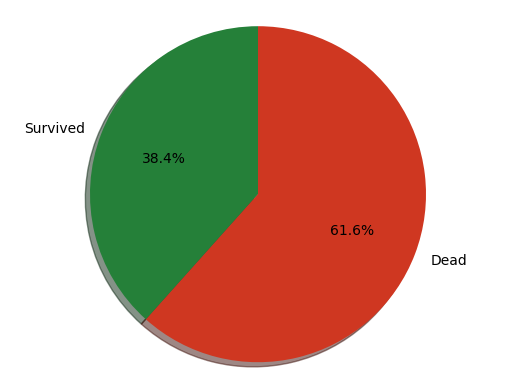

In [14]:
labels = 'Survived', 'Dead'
colors = ['#258039', '#CF3721']
sizes = [(df['Survived']==1).sum(), (df['Survived']==0).sum()]
explode = [0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')

plt.show()

Можна сказати, що загиблих в півтори рази більше ніж тих, хто вижив



3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


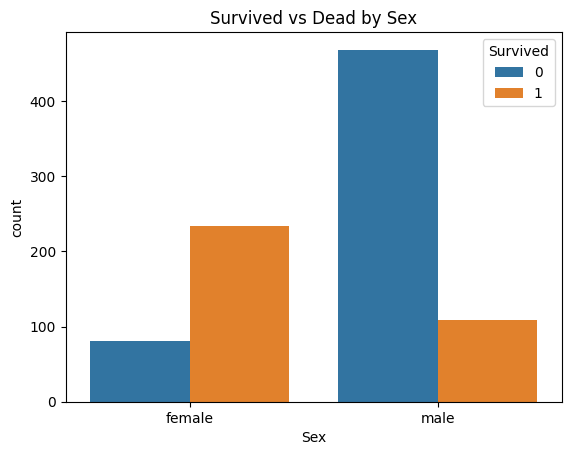

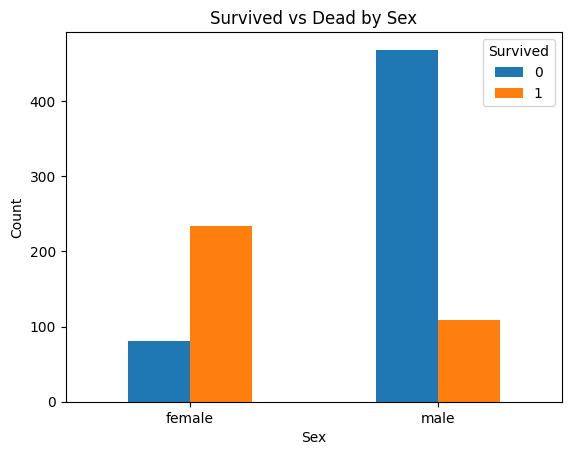

In [15]:
grouped_data = df.groupby(['Sex', 'Survived']).size().unstack()

grouped_data.plot(kind='bar')

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Survived', loc='upper right')

plt.show()

Незважаючи на те, що загалом кількість чоловіків була в два рази більшою за кількість жінок, ми бачимо що кількість жінок що вижили, приблизно в 2.5 рази переважає кількість загиблих жінок, в той час як у чоловіків більша частина загинула і значно менша частина вижила(десь ~ 1/5).
І це є логічним, бо за катастрофи у човни саджали першими жінок і дітей.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

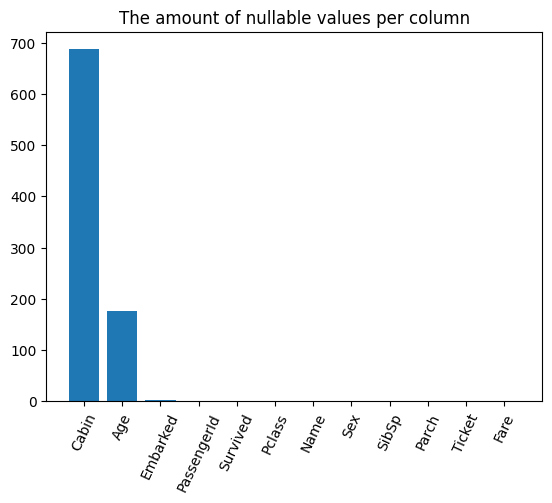

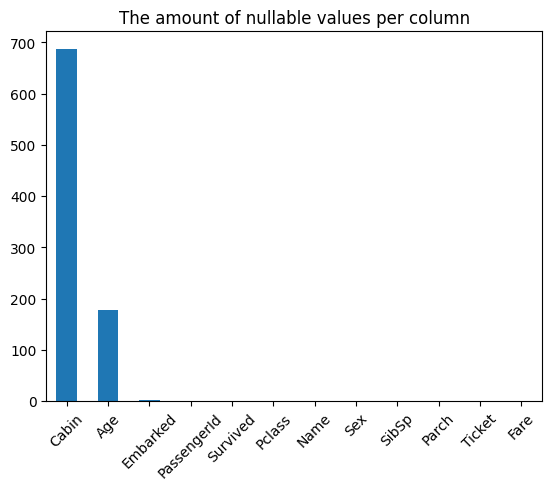

In [16]:
missing_values = df.isnull().sum()

missing_values_sorted = missing_values.sort_values(ascending=False)

missing_values_sorted.plot(kind='bar')
plt.title('The amount of nullable values per column')

plt.xticks(rotation=45)

plt.show()

Бачимо, що колока "Cabin" має дуже багато пропущених значень, також колонка "Age" має приблизно 20 % пустих значень, немає також двох значень в колонці "Embarked", інші колонки взагалі пропущених значень не мають.
Отже можемо спокійно видаляти колонку "Cabin", а пропущенні значення колонки "Age" заповнювати наприклад медіанним значенням. Я би подивилась на людей значення яких пропущенно у колонці "Embarked", і якщо вони не є особливими просто видалила, щоб в датасеті взагал не було пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

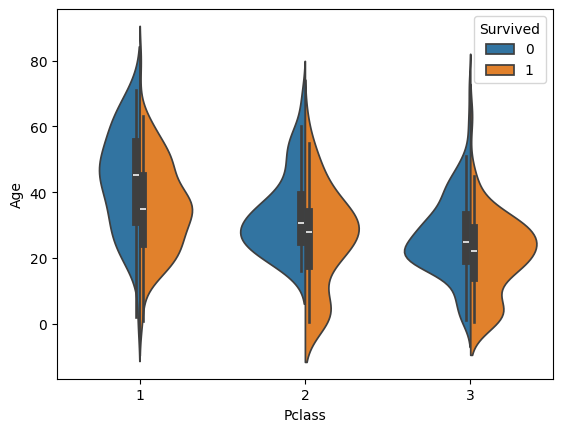

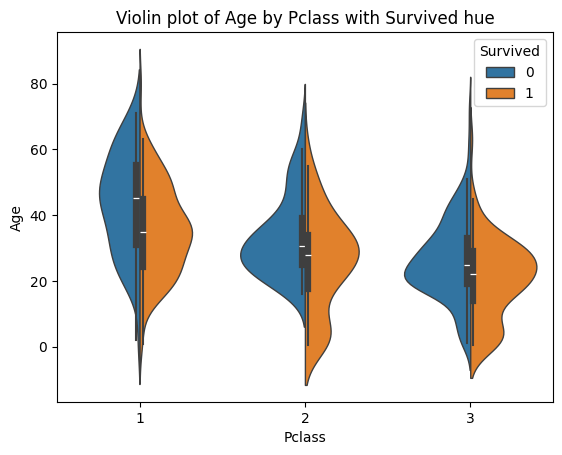

In [17]:
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived",
               split=True, linewidth=1)
plt.title('Violin plot of Age by Pclass with Survived hue')
plt.show()

На цій візуалізації можна побачити, що:

1) В першому класі трохи більше людей виживо, ніж загинуло

2) В 2 і 3 класі більшість людей які загинули - це люди віку 25-30 років.

3) Більшість загиблих першого класу - десь віку ~45.

4) Також видно що діти майже не загинули.

5) У всіх трьох класах вік більшості людей, що вижили - 30.

На мою думку це зумовлюється ще тим, що загалом на кораблі більшість людей була віком від 20-35, в той час як дітей та літніх людей було менше.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


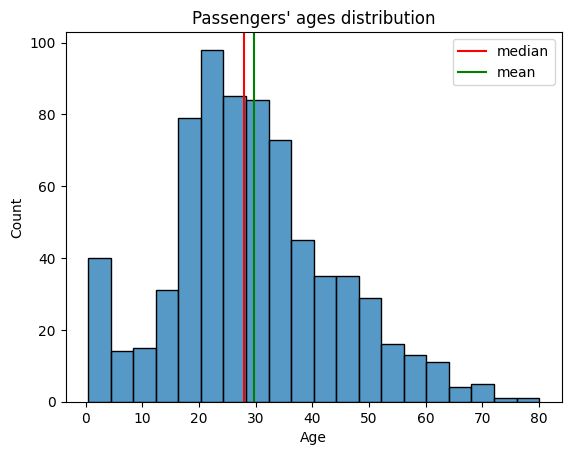

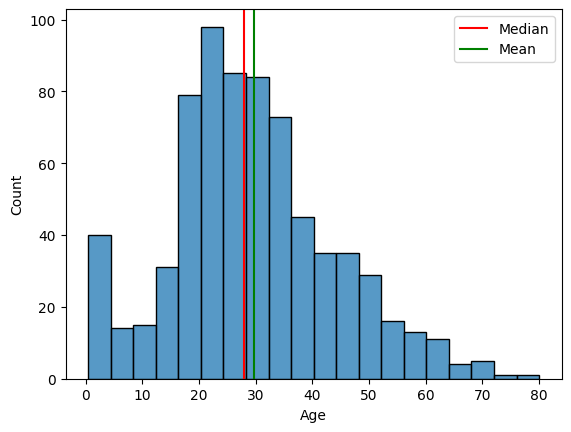

In [18]:
sns.histplot(df, x="Age", bins=20)
median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.axvline(median_age, color='red', linewidth=1.5, label=f'Median')

plt.axvline(mean_age, color='green', linewidth=1.5, label=f'Mean')

plt.legend()
plt.show()

Більшість людей належала до вікової групи 20-24 років, проте основну частку становили особи у віці від 18 до 35 років. Було достатньо багато дітей віком до 4 років, у той час як люди старшого віку та діти віком від 5 до 16 років зустрічаються рідше. Середній вік становив 30 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи залежить на виживання людини той фактор, що вона мала родину, або була одна?

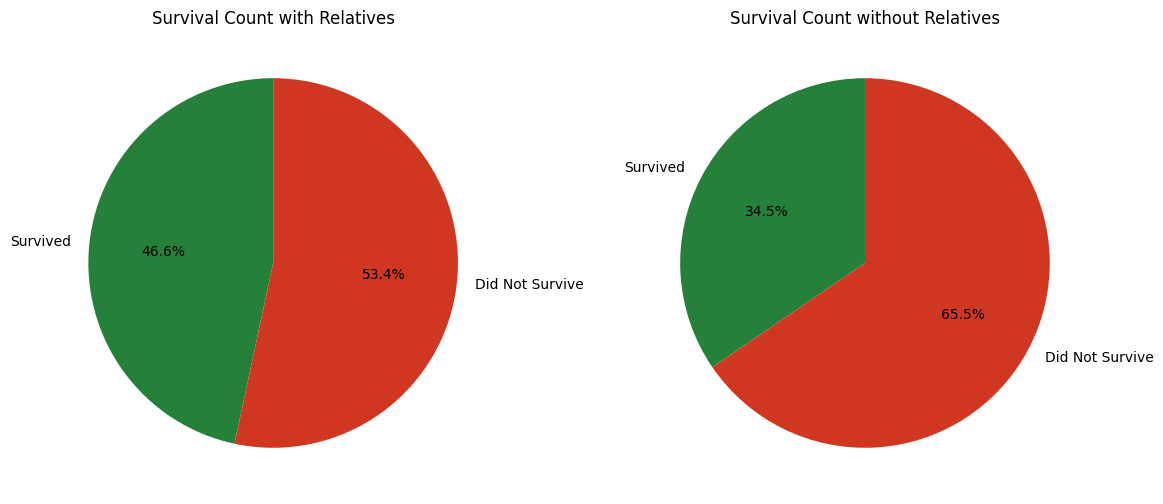

In [19]:
# Divide data into two groups: passengers with and without relatives
with_relatives = df[df['SibSp'] > 0]
without_relatives = df[df['SibSp'] == 0]

# Calculate the number of survivors and non-survivors for each group
survived_with_relatives = with_relatives['Survived'].sum()
not_survived_with_relatives = len(with_relatives) - survived_with_relatives
survived_without_relatives = without_relatives['Survived'].sum()
not_survived_without_relatives = len(without_relatives) - survived_without_relatives

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for passengers with relatives
sizes_with = [survived_with_relatives, not_survived_with_relatives]
labels = ['Survived', 'Did Not Survive']
colors = ['#258039', '#CF3721']
ax1.pie(sizes_with, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Survival Count with Relatives')

# Pie chart for passengers without relatives
sizes_without = [survived_without_relatives, not_survived_without_relatives]
ax2.pie(sizes_without, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Survival Count without Relatives')

plt.show()

Дуже легко можна побачити, що наявність родини сильно підіймала шанс людини вижити. Тобто з людей що мали родичів вижила половина, в той час з людей що їх не мали, вижила третина.
Можу припустити, що наявність родичів позитивно впливала на шанси виживання через взаємодопомогу чи більшу мотивацію знаходити шляхи для евакуації.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

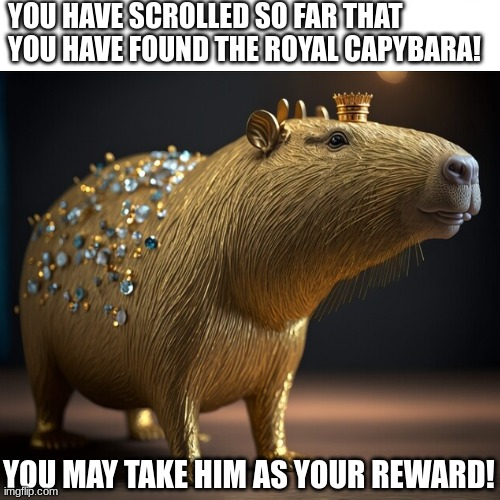